<a href="https://colab.research.google.com/github/naveen4555/Medical-insurance-charges-Prediction/blob/main/Medical_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [19]:
data = pd.read_csv('/content/insurance.csv')

<ipython-input-20-9bf771ec54b0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


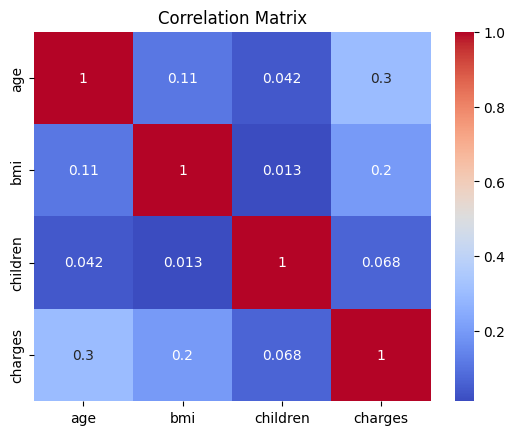

In [20]:
# Task 1
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [21]:
# Task 2
top10_states = data.nlargest(10, 'charges')
print("Top 10 states with highest charges:")
print(top10_states[['region', 'charges']])

Top 10 states with highest charges:
         region      charges
543   southeast  63770.42801
1300  southeast  62592.87309
1230  northwest  60021.39897
577   northeast  58571.07448
819   northwest  55135.40209
1146  southwest  52590.82939
34    southwest  51194.55914
1241  southeast  49577.66240
1062  southeast  48970.24760
488   southeast  48885.13561


In [22]:
# Task 3
oldest_population = data.groupby('region')['age'].mean().sort_values(ascending=False).index[0]
highest_charges_region = data.groupby('region')['charges'].mean().sort_values(ascending=False).index[0]

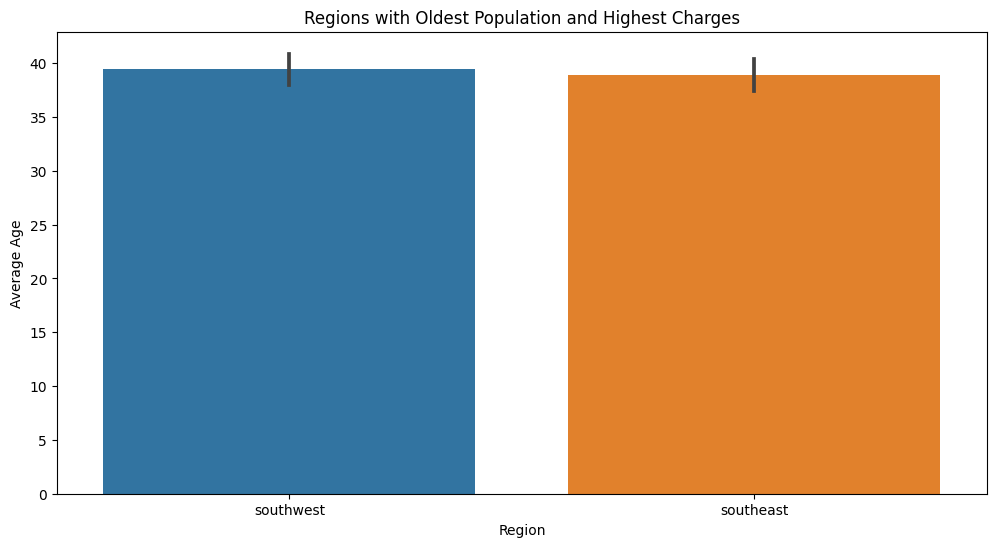

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='age', data=data, order=[oldest_population, highest_charges_region])
plt.title('Regions with Oldest Population and Highest Charges')
plt.xlabel('Region')
plt.ylabel('Average Age')
plt.show()



In [24]:
# Task 4
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

In [28]:
X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

In [27]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [18]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 33596915.85136145
R-squared: 0.7835929767120724
